<a href="https://colab.research.google.com/github/UPASNA-AGGARWAL/ML_PROJECTS/blob/main/Document_Scanner_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This project  involves image processing and computer vision techniques applied to a  document. The steps include resizing, edge detection, contour extraction, perspective transformation, blending with another image, and marking a specific region. The potential needs for such a project are document analysis, feature extraction, or region highlighting for further analysis. Future applications  includes automated document recognition, augmented reality interfaces, or enhanced image understanding. The project
demonstrates skills in image manipulation, contour analysis, and perspective transformation, providing a foundation for broader applications in fields like automation, document processing, and computer vision.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

Original image shape: (1280, 1087, 3)
Resized image shape: (800, 1500, 3)


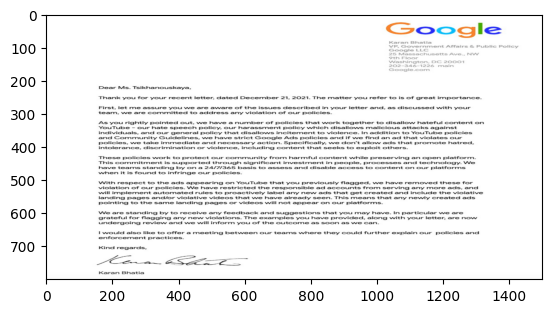

In [ ]:
import cv2
import matplotlib.pyplot as plt

im_path = '/content/google.jpg'
img = cv2.imread(im_path)

if img is not None:
    print("Original image shape:", img.shape)
    img_resized = cv2.resize(img, (1500, 800))
    print("Resized image shape:", img_resized.shape)

    plt.imshow(img_resized)
    plt.show()
else:
    print(f"Error: Unable to read the image at path: {im_path}")



his code reads and displays image, prints its original and resized shapes, and handles errors if the image cannot be loaded from the specified path.

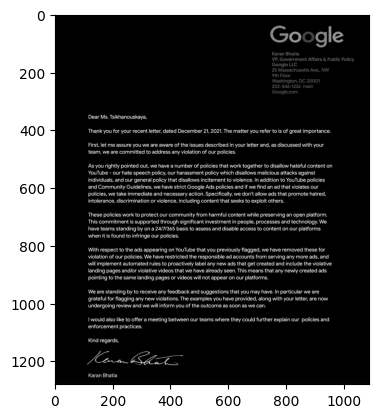

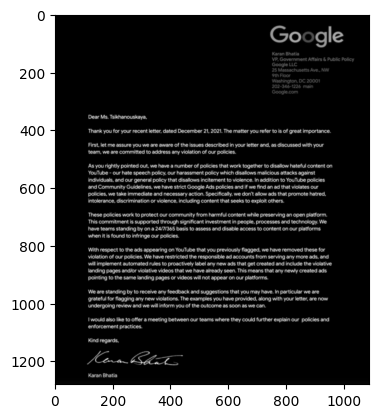

In [ ]:
#remove the noise
#blurring image
orig = img.copy()
gray = cv2.cvtColor(orig , cv2.COLOR_BGR2GRAY)
plt.imshow(gray , cmap = 'binary')
plt.show()

blurred = cv2.GaussianBlur(gray,(5,5),0)
plt.imshow(blurred , cmap='binary')
plt.show()

This code applies noise removal to image  by converting it to grayscale, displaying the grayscale version, and then applying Gaussian blur to the grayscale image, followed by displaying the blurred result. The blurring helps in reducing image noise.

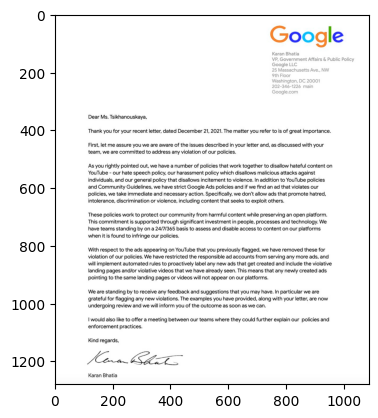

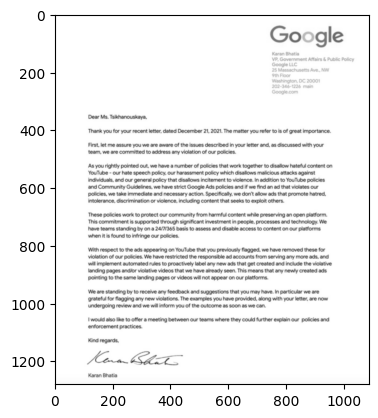

In [ ]:
regen = cv2.cvtColor(blurred , cv2.COLOR_GRAY2BGR)
plt.imshow(orig)
plt.show()
plt.imshow(regen)
plt.show()

This code regenerates a color image from the previously blurred grayscale image (blurred). It converts the blurred grayscale image back to a color image (regen) using cv2.cvtColor() and the COLOR_GRAY2BGR color conversion flag. It then displays both the original color image (orig) and the regenerated color image for comparison using Matplotlib.








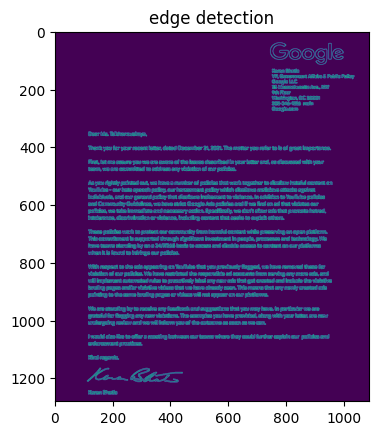

In [ ]:
#edge detection
edge = cv2.Canny(blurred,0,50)
orig_edge = edge.copy()
plt.imshow(orig_edge)
plt.title("edge detection")
plt.show()


This code performs edge detection on the blurred image (blurred) using the Canny edge detection algorithm. The resulting edges are stored in the edge variable and displayed using Matplotlib with the title "Edge Detection."

In [ ]:
#countour extraction
contours, _=cv2.findContours(edge , cv2.RETR_LIST , cv2.CHAIN_APPROX_NONE)
print(len(contours))

contours = sorted(contours , reverse= True , key= cv2.contourArea)
import cv2
target = None
for c in contours:
    p = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.01*p, True)
    if len(approx) == 4:
        target = approx
        break

if target is not None:
    print(target.shape)
else:
    print("No contour with four vertices found.")

3930
(4, 1, 2)


This code performs contour extraction on the edges obtained from the Canny edge detection (edge). It finds contours using cv2.findContours(), sorts them based on area in descending order, and then iterates through the contours to find a contour with four vertices. The four-vertex contour (if found) is stored in the variable target. The code prints the number of contours and the shape of the target contour if one is found.

In [ ]:
def reorder(h):
    h= h.reshape((4,2))
    print(h)

    hnew= np.zeros((4,2), dtype=np.float32)
    add = h.sum(axis=1)
    hnew[3]= h[np.argmax(add)]
    hnew[1]= h[np.argmax(add)]

    diff = np.diff(h , axis=1)
    hnew[0]=h[np.argmax(diff)]
    hnew[2]= h[np.argmax(diff)]
    return hnew

In [ ]:
reorder = reorder(target)
print('*************')
print(reorder)

[[948  42]
 [947  96]
 [955  97]
 [956  43]]
*************
[[947.  96.]
 [955.  97.]
 [947.  96.]
 [955.  97.]]


The purpose of this code is to define a function reorder that takes a 1D array h, assumed to represent the vertices of a quadrilateral, and reshapes it into a 2D array. The function then identifies the vertices of the quadrilateral and reorders them based on their sum and difference calculations. The reordered vertices are returned as a new 2D array.

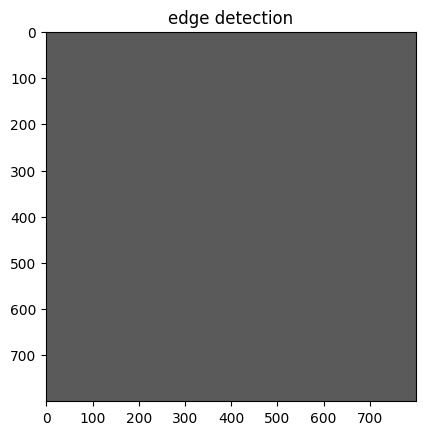

In [ ]:
#project to a fixed screen
input_representation = reorder
output_map = np.float32([[0,0],[800,0],[800,800],[0,800]])
m =cv2.getPerspectiveTransform(input_representation , output_map)
ans = cv2.warpPerspective(orig , m , (800,800))
plt.imshow(ans)
plt.title('edge detection')
plt.show()


This code performs perspective transformation on the original image (orig). It uses the cv2.getPerspectiveTransform function to calculate the transformation matrix (m) based on the input representation of the vertices (input_representation) and the desired output map of vertices (output_map). The transformation is then applied to the original image using cv2.warpPerspective, resulting in a perspective-transformed image (ans), which is displayed using Matplotlib. The purpose is likely to project the original image onto a fixed-screen perspective.

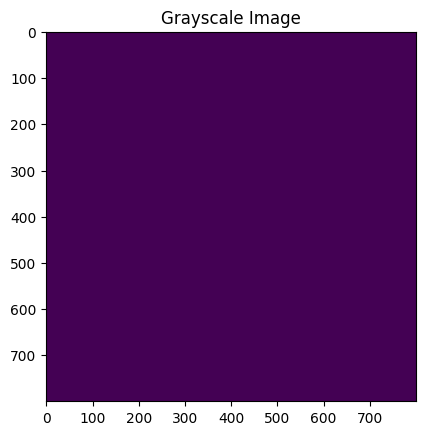

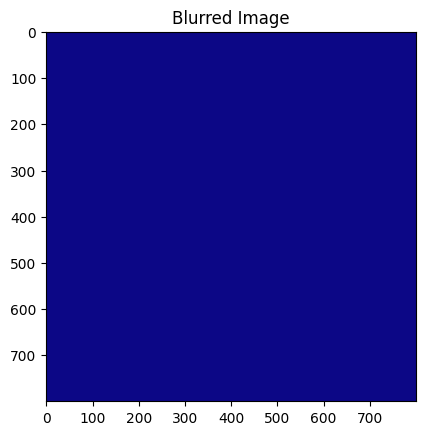

In [ ]:
res = cv2.cvtColor(ans, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
b_res = cv2.GaussianBlur(res, (3, 3), 0)

plt.imshow(res, cmap='viridis')
plt.title('Grayscale Image')
plt.show()

plt.imshow(b_res, cmap='plasma')
plt.title('Blurred Image')
plt.show()


This code marks a region on the perspective-transformed image (ans). It specifies the coordinates of the top-left corner (x1, y1) and the bottom-right corner (x2, y2) of the rectangle. The cv2.rectangle function is used to draw the rectangle on the image with a green color (represented as (0, 255, 0)) and a line thickness of 2.The purpose is likely to visually indicate a specific region of interest on the image.

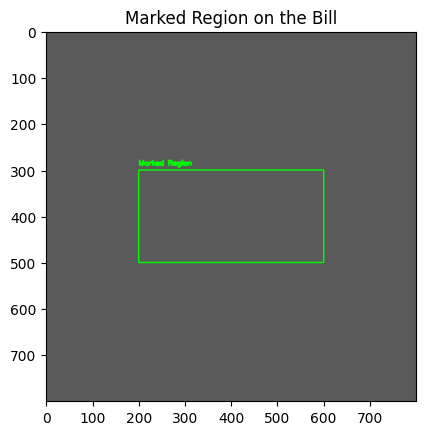

In [ ]:
# Mark a region
marked_img = ans.copy()

x1, y1 = 200, 300
x2, y2 = 600, 500

cv2.rectangle(marked_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

cv2.putText(marked_img, 'Marked Region', (x1, y1 - 10), font, 0.5, (0, 255, 0), 2, cv2.LINE_AA)

plt.imshow(marked_img)
plt.title('Marked Region on the Bill')
plt.show()


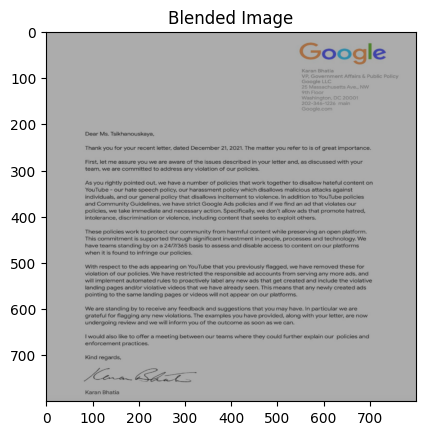

In [ ]:
# Blend  images
img2 = cv2.imread('/content/google.jpg')
img2 = cv2.resize(img2, (800, 800))

alpha = 0.5
blended_img = cv2.addWeighted(ans, alpha, img2, 1 - alpha, 0)
plt.imshow(blended_img)
plt.title('Blended Image')
plt.show()

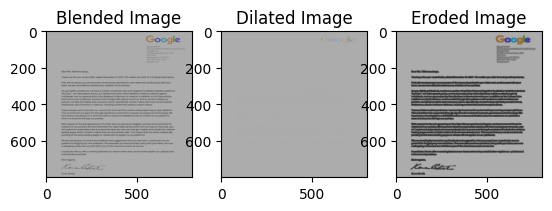

In [ ]:
img_path = '/content/google.jpg'
img2 = cv2.imread(img_path)
img2 = cv2.resize(img2, (800, 800))

alpha = 0.5
blended_img = cv2.addWeighted(ans, alpha, img2, 1 - alpha, 0)

# Apply morphological operations to the blended image
kernel = np.ones((5, 5), np.uint8)
dilated_img = cv2.dilate(blended_img, kernel, iterations=1)
eroded_img = cv2.erode(blended_img, kernel, iterations=1)
plt.subplot(1, 3, 1)
plt.imshow(blended_img)
plt.title('Blended Image')

plt.subplot(1, 3, 2)
plt.imshow(dilated_img)
plt.title('Dilated Image')

plt.subplot(1, 3, 3)
plt.imshow(eroded_img)
plt.title('Eroded Image')

plt.show()

This code blends two images (ans and img2) using the cv2.addWeighted function with a specified alpha value. It then applies morphological operations to the blended image (blended_img) using dilation and erosion. The resulting images are displayed using Matplotlib in a single row with three subplots: the original blended image, the dilated image, and the eroded image. The purpose is to showcase the effects of blending and morphological operations on the images.







Saving google.jpg to google (2).jpg


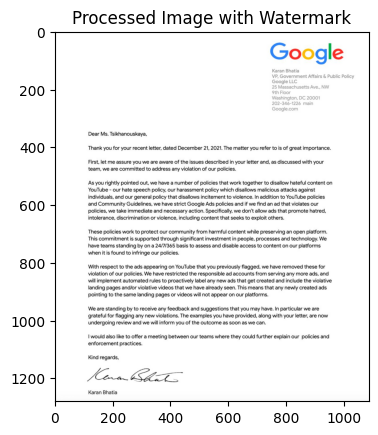

In [ ]:
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

# Upload an image
uploaded = files.upload()

for filename in uploaded.keys():
    img = cv2.imread(filename)

    watermark_text = "Upasna"
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, watermark_text, (10, img.shape[0] - 10),
                font, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

    # Display the processed image with the watermark
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Processed Image with Watermark')
    plt.show()



This code allows users to upload an image in a Google Colab environment, adds a watermark  to the image at the bottom left corner, and displays the processed image with the watermark. It serves as a simple demonstration of basic image manipulation, user interaction, and visualization in a collaborative environment like Google Colab. The purpose could be to showcase skills in handling user inputs, incorporating text into images, and presenting visual results.